In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [77]:
data = pd.read_csv('Housing.csv')

In [78]:
type(data)

pandas.core.frame.DataFrame

In [79]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [80]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [81]:
data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [82]:
data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [83]:
data['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [84]:
print(data['guestroom'].value_counts())
print(data['basement'].value_counts())
print(data['hotwaterheating'].value_counts())
print(data['prefarea'].value_counts())


guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


turm categories to number

In [86]:
data.replace({'mainroad':{'no':0,'yes':1}},inplace=True)
data.replace({'furnishingstatus':{'semi-furnished':0,'unfurnished':1,'furnished':2}},inplace=True)
data.replace({'airconditioning':{'no':0,'yes':1}},inplace=True)
data.replace({'guestroom':{'no':0,'yes':1}},inplace=True)
data.replace({'basement':{'no':0,'yes':1}},inplace=True)
data.replace({'hotwaterheating':{'no':0,'yes':1}},inplace=True)
data.replace({'prefarea':{'no':0,'yes':1}},inplace=True)


In [87]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [88]:
correlation =data.corr()
#print(correlation)

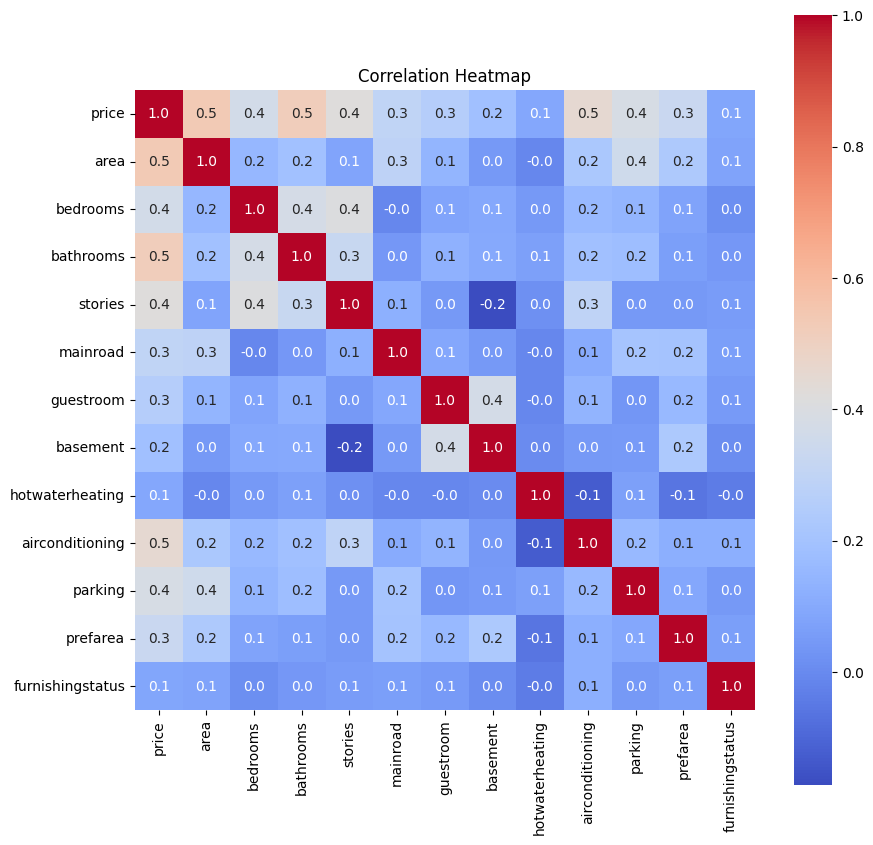

In [89]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

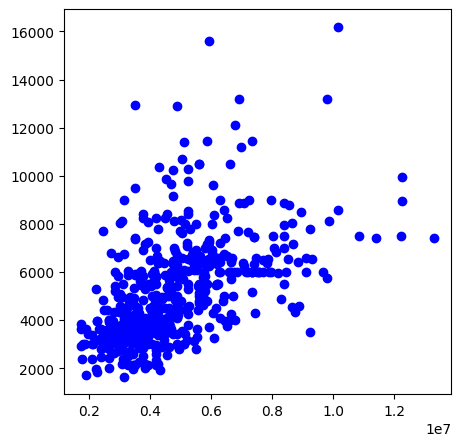

In [90]:
plt.figure(figsize=(5, 5))  # Set the figure size
plt.scatter(data['price'], data['area'], color='blue')

In [91]:
#spliting data
X = data.drop(['price','area'],axis=1)
Y = data['price']

In [92]:
print(X)
print(Y)

     bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0           4          2        3         1          0         0   
1           4          4        4         1          0         0   
2           3          2        2         1          0         1   
3           4          2        2         1          0         1   
4           4          1        2         1          1         1   
..        ...        ...      ...       ...        ...       ...   
540         2          1        1         1          0         1   
541         3          1        1         0          0         0   
542         2          1        1         1          0         0   
543         3          1        1         0          0         0   
544         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0                1        2         1                 2  
1                  0         

In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [94]:
print(X.shape,X_train.shape,X_test.shape)

(545, 11) (436, 11) (109, 11)


In [95]:
#model selection
model = XGBRegressor()


In [96]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

model evalution

In [99]:
train_predict_data = model.predict(X_train)

In [100]:
print(train_predict_data)

[ 3769201.   3878144.5  3082975.5  3489509.5  2948965.5  7132776.
  2776979.8  2669709.8  6913040.5  4583568.5  2786456.5  3039158.5
  6010722.5  5800289.   7346791.5  5125005.5  5291696.   3936164.
  7787711.   4156232.8  4250954.   2776979.8  5530891.5  4032242.2
  3911374.5  3968922.   6797657.   9138713.   4103363.8  2948965.5
  3911899.   2812249.5  3500487.2  4456765.5  4532536.5  3055190.
  4558499.   3526984.   2948965.5  7986198.   4076269.8 12064469.
  8551483.   7352939.   4205544.5  3959368.5  4012058.   3331946.5
  3354222.5  2776979.8  5940818.5  3895823.8  3840585.8  3329846.
  3936164.   5428700.5  3645319.5  3644892.   3324973.2  4456765.5
  7122572.   3946378.8  5994671.5  3164064.   3878144.5  5645341.5
  6687527.5  5838276.5  4490282.5  5658761.5  3195867.8  4624519.
  3185439.8  4787236.5  5294452.5  3575622.5  5643065.5  4287349.
  6957113.   5374287.   3041952.8  3281865.2  6609381.   4647756.5
  6049049.   8069884.   2776979.8  3344633.2  9739723.   4246395.5
  

In [102]:
#r2 error
score1 = metrics.r2_score(Y_train,train_predict_data)
#mean absolute error
score2 = metrics.mean_absolute_error(Y_train,train_predict_data)

print("R squared error : ", score1)
print('Mean Absolute Error : ', score2)


R squared error :  0.936255355936603
Mean Absolute Error :  274473.5711009174


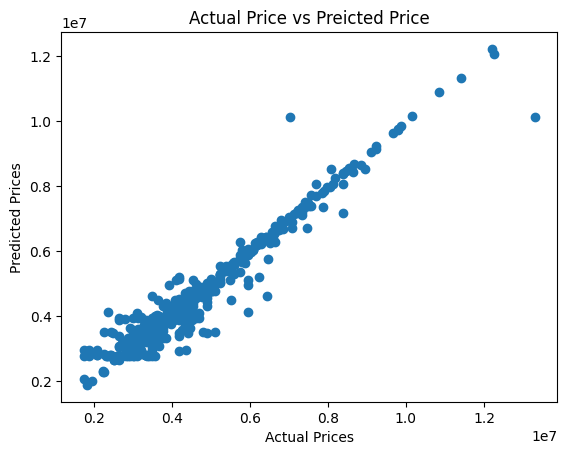

In [103]:
plt.scatter(Y_train, train_predict_data)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [105]:
train_predict_data = model.predict(X_test)

In [106]:
#r2 error
score1 = metrics.r2_score(Y_test,train_predict_data)
#mean absolute error
score2 = metrics.mean_absolute_error(Y_test,train_predict_data)

print("R squared error : ", score1)
print('Mean Absolute Error : ', score2)

R squared error :  0.3306055419446331
Mean Absolute Error :  1069978.4678899082


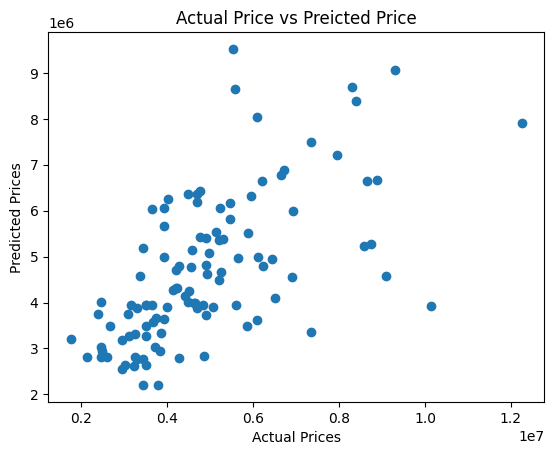

In [107]:
plt.scatter(Y_test, train_predict_data)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()